# Predicting Road Accident Severity Using Machine Learning Models
A Case Study on Road Accident Statistics in the United Kingdom

## Data Understanding

For this project the latest road accident and safety statistics was used from 2018, covering the territory of Great Britain. Unfortunately, the data cannot be compared with annual data published before 2015, as the severity reporting has been changed. Considering that the database includes various features regarding the environment, drivers' and casualties' characteristics, it provides a comprehensive description of the circumstances. 

The data is published in three datasets annualy: 
> 1. The first dataset describes the accidents, the number of casualties and in terms of our target variable, which is accident severity, it records, whether at least one party was severly injured or died. In cases, when no such outcome was observed, it is indicated as slight injury. The dataset also doesn't include accidents with property-damage only, only ones, where at least one party was injured. 
> 2. The second dataset describes the driver's behaviour, age, gender and the vehicle's manouver and condition. Unfortunately, there is no record of substance abuse or exceeding the speed limit for 2018, whcih could significantly improve the accuracy of the model. 
> 3. The third dataset describes the casualties, their mode of transport, as well as their behaviour during the accident.

The variable lookup is available trhough the following [link](http://data.dft.gov.uk/road-accidents-safety-data/variable%20lookup.xls). Below, only those variables are feautured that were used for the model development.

*Note: Missing values and values out of range are marked with "-1" in the dataset.

| Variable name | Type | No. of Categories |
| -: | :-: | :-: |
| Accident_Index | Unique Identifier | - |
| Vehicle_Type | Nominal | 20 |
| Vehicle_Leaving_Carriageway | Nominal | 9 |
| Age_Band_of_Driver | Nominal | 11 |
| Sex_of_Driver| Nominal | 3 |
| Pedestrian_Location | Nominal | 11 |
| Accident_Severity | Nominal | 3 |
| Number_of_Vehicles | Numeric | - |
| Number_of_Casualties | Numeric | - |
| 1st_Road_Class | Nominal | 6 |
| Road_Type | Nominal | 7 |
| Speed_limit| Numeric | - |
| Junction_Detail | Nominal | 9 |
| Light_Conditions | Nominal | 5 |
| Weather_Conditions | Nominal | 9 |
| Road_Surface_Conditions | Nominal | 7 |
| Urban_or_Rural_Area | Nominal | 3 |
| Casualty_Type | Nominal | 21 |

Since most of the data is in a nominal scale, most of the variables will need to be transformed into binary variables. This will be achieved by the One Hot Encoding technique in Python. As there were 18 variables used for the model development, only a a selection of key variables is visualised and their relationship analysed with the target variable.

### _Importing data into Pandas dataframe_

_Importing relevant libraries._

In [190]:
import io
import requests
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

_Importing the Road Accindents 2018 dataset into a pandas dataframe._

In [191]:
url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv"
s=requests.get(url).content
df1=pd.read_csv(io.StringIO(s.decode('utf-8')))
df1.head()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2018010080971               529150.0                182270.0  -0.139737   
1  2018010080973               542020.0                184290.0   0.046471   
2  2018010080974               531720.0                182910.0  -0.102474   
3  2018010080981               541450.0                183220.0   0.037828   
4  2018010080982               543580.0                176500.0   0.065781   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.524587             1                  3                   2   
1  51.539651             1                  3                   1   
2  51.529746             1                  3                   2   
3  51.530179             1                  2                   2   
4  51.469258             1                  2                   2   

   Number_of_Casualties        Date            ...              \
0                     2  01/01/2018            ...               
1                     1  01/01/2018            ...               
2                     1  01/01/2018            ...               
3                     1  01/01/2018            ...               
4                     2  01/01/2018            ...               

   Pedestrian_Crossing-Human_Control Pedestrian_Crossing-Physical_Facilities  \
0                                  0                                       0   
1                                  0                                       0   
2                                  0                                       5   
3                                  0                                       5   
4                                  0                                       0   

   Light_Conditions Weather_Conditions  Road_Surface_Conditions  \
0                 4                  1                        1   
1                 4                  1                        1   
2                 4                  1                        1   
3                 4                  2                        2   
4                 4                  1                        2   

   Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   
3                           0                    0                    1   
4                           0                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  
0                                            1                  E01000854  
1                                            1                  E01003531  
2                                            1                  E01002723  
3                                            1                  E01003492  
4                                            1                  E01001682  

[5 rows x 32 columns]

_Importing the vehicles' and driver's description._

In [192]:
url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv"
s=requests.get(url).content
df2=pd.read_csv(io.StringIO(s.decode('utf-8')))
df2.head()

Accident_Index  Vehicle_Reference  Vehicle_Type  Towing_and_Articulation  \
0  2018010080971                  1             9                        0   
1  2018010080971                  2             8                        0   
2  2018010080973                  1             9                        0   
3  2018010080974                  1             8                        0   
4  2018010080974                  2             9                        0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                 18                                 0                  0   
1                 18                                 0                  0   
2                 18                                 0                  2   
3                  7                                 0                  8   
4                 18                                 0                  1   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   Vehicle_Leaving_Carriageway         ...          Journey_Purpose_of_Driver  \
0                            0         ...                                  6   
1                            0         ...                                  6   
2                            0         ...                                  6   
3                            0         ...                                  1   
4                            3         ...                                  6   

   Sex_of_Driver  Age_of_Driver  Age_Band_of_Driver  Engine_Capacity_(CC)  \
0              1             32                   6                  1995   
1              1             48                   8                  1798   
2              3             -1                  -1                    -1   
3              1             40                   7                  1797   
4              1             21                   5                    -1   

   Propulsion_Code  Age_of_Vehicle  Driver_IMD_Decile  Driver_Home_Area_Type  \
0                2               5                  8                      1   
1                8               6                  1                      1   
2               -1              -1                 -1                     -1   
3                8               6                  3                      1   
4               -1              -1                  5                      1   

   Vehicle_IMD_Decile  
0                   8  
1                   1  
2                  -1  
3                   3  
4                   5  

[5 rows x 23 columns]

_Importing the description of the casualties._

In [193]:
url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv"
s=requests.get(url).content
df3=pd.read_csv(io.StringIO(s.decode('utf-8')))
df3.head()

Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0  2018010080971                  1                   1               2   
1  2018010080971                  2                   2               1   
2  2018010080973                  1                   1               3   
3  2018010080974                  1                   1               1   
4  2018010080981                  1                   1               1   

   Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
0                2               50                     8                  3   
1                1               48                     8                  3   
2                1               29                     6                  3   
3                1               40                     7                  3   
4                1               27                     6                  2   

   Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
0                    0                    0              2   
1                    0                    0              0   
2                    5                    1              0   
3                    0                    0              0   
4                    0                    0              0   

   Bus_or_Coach_Passenger  Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
0                       0                                   0              9   
1                       0                                   0              8   
2                       0                                   2              0   
3                       0                                   0              8   
4                       0                                   0              9   

   Casualty_Home_Area_Type  Casualty_IMD_Decile  
0                        1                    8  
1                        1                    1  
2                        1                    3  
3                        1                    3  
4                        1                    7

_Getting dataframe dimensions_

In [194]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(122635, 32)
(226409, 23)
(160597, 16)


As it is seen from the dimensions of the dataframes, they have a different number of rows and columns. The columns correspond to the variables, while the rows to the number of observations. This should be kept in mind, when joining the dataframes.

### _Analysing the Data_

Now, let's install the seaborn package in the notebook. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [195]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda

  added / updated specs:
    - seaborn


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> anaconda::ca-certificates-2020.7.22-0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2020.6.20-py37hc~ --> anaconda::certifi-2020.6.20-py37_0
  conda              conda-forge::conda-4.8.5-py37hc8dfbb8~ --> anaconda::conda-4.8.5-py37_0
  openssl            conda-forge::openssl-1.0.2u-hfa6e2cd_0 --> anaconda::openssl-1.0.2u-he774522_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


#### Distribution of Accident Severity

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


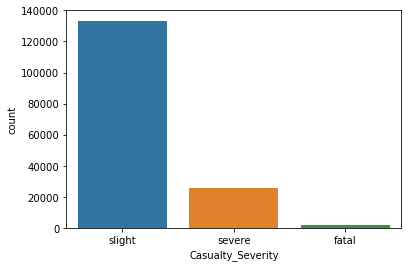

In [196]:
import seaborn as sns
mapping = {
1:'fatal',
2:'severe',
3:'slight'}

df_figure=df3.Casualty_Severity.map(mapping) 

ax = sns.countplot(df_figure)
plt.show()

Having a peek at the above figure, it becomes visible that the distribution of accident severety is extremely skewed. This is also referred to as poisson distribution, when one category has a high number of observation and the frequency of observation rapidly drops in further categories. 

Since there are relatively few fatal accidents observed in the dataset, it is reasonable to merge severe and fatal categories into one category. This will allow better visualisation and a more balanced sample for further statistical analysis. Also, having a binary target variable is more suitable to be used for the selected GML models.

In [197]:
severity=[]
for accident in df1['Accident_Severity']:
    if accident==1 or accident==2: severity.append('Severe') #1 corresponds to fatal and 2 to severe accidents
    else: severity.append('Slight') #3 corresponds to slight injury in the dataset
df1['Severity']=severity
df1=df1.drop('Accident_Severity',axis=1)
df1.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2018010080971               529150.0                182270.0  -0.139737   
1  2018010080973               542020.0                184290.0   0.046471   
2  2018010080974               531720.0                182910.0  -0.102474   
3  2018010080981               541450.0                183220.0   0.037828   
4  2018010080982               543580.0                176500.0   0.065781   

    Latitude  Police_Force  Number_of_Vehicles  Number_of_Casualties  \
0  51.524587             1                   2                     2   
1  51.539651             1                   1                     1   
2  51.529746             1                   2                     1   
3  51.530179             1                   2                     1   
4  51.469258             1                   2                     2   

         Date  Day_of_Week    ...    Pedestrian_Crossing-Physical_Facilities  \
0  01/01/2018            2    ...                                          0   
1  01/01/2018            2    ...                                          0   
2  01/01/2018            2    ...                                          5   
3  01/01/2018            2    ...                                          5   
4  01/01/2018            2    ...                                          0   

   Light_Conditions Weather_Conditions  Road_Surface_Conditions  \
0                 4                  1                        1   
1                 4                  1                        1   
2                 4                  1                        1   
3                 4                  2                        2   
4                 4                  1                        2   

   Special_Conditions_at_Site  Carriageway_Hazards  Urban_or_Rural_Area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   
3                           0                    0                    1   
4                           0                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  \
0                                            1                  E01000854   
1                                            1                  E01003531   
2                                            1                  E01002723   
3                                            1                  E01003492   
4                                            1                  E01001682   

   Severity  
0    Slight  
1    Slight  
2    Slight  
3    Severe  
4    Severe  

[5 rows x 32 columns]

#### Urban and Rural Areas

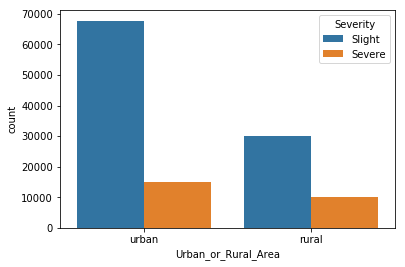

In [198]:
mapping = {
1:'urban',
2:'rural'}

df_figure=df1.Urban_or_Rural_Area.map(mapping)

ax = sns.countplot(x=df_figure, hue="Severity", data=df1)
plt.show()

The figure above shows that while there are more accidents in urban areas, they less likely have a severe or fatal outcome than the ones in rural areas. This can be explained by higher traffic, but lower speed limits. In rural areas due to lower traffic, cars may less likely collide, but there will be a higher chance of sever or fatal outcome due to higher speed limits.

#### Plotting the Accidents on Map

In [199]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda

  added / updated specs:
    - folium=0.5.0


The following packages will be UPDATED:

  conda                        anaconda::conda-4.8.5-py37_0 --> conda-forge::conda-4.8.5-py37hc8dfbb8_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates     anaconda::ca-certificates-2020.7.22-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi                anaconda::certifi-2020.6.20-py37_0 --> conda-forge::certifi-2020.6.20-py37hc8dfbb8_0
  openssl               anaconda::openssl-1.0.2u-he774522_0 --> conda-forge::openssl-1.0.2u-hfa6e2cd_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Folium installed and imported!


In [200]:
df_locations=pd.DataFrame(df1[['Longitude','Latitude','Severity']]).reset_index()
df_locations.replace(-1, np.nan, inplace=True)
df_locations.dropna(axis=0, inplace=True,how ='any')
subset=df_locations.sample(n=5000)

In [201]:
import folium
from folium.plugins import FastMarkerCluster


m=folium.Map(location=[53.8074, -3.6078],
                    zoom_start = 5.5, tiles='Stamen Terrain')
def add_marker(row):
    if row['Severity']=='Severe':

        marker=folium.CircleMarker([row['Latitude'],row['Longitude']],radius=2,color='red',popup=row['Severity'])
        marker.add_to(m)

    else:
        marker=folium.CircleMarker([row['Latitude'],row['Longitude']],radius=2,color='blue',popup=row['Severity'])
        marker.add_to(m)

subset.apply(add_marker,axis=1)
m

The map also shows that while there are more accidents around densely populated areas, accidents in peripherial areas tend to be rather severe or fatal. It is also visible that the data the distribution of accident severity is still skewed. In order to address data skewdness in data visualisation, a scale break is introduced via the following procedure, cutting outliers. This will help especially in the case of variables with more categories.

#### Accidents by Road Type

In [202]:
def brokenaxis(col,low_max,h_min,h_max,data):
    
    f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                                 sharex=True)
    ax1 = sns.countplot(x=col, hue='Severity', data=data, ax=ax1) #col refers to variable, we would like to measure

    ax2 = sns.countplot(x=col, hue='Severity', data=data, ax=ax2) #the procedure is repeated for the second half of the y axis

    ax1.set_ylim(h_min,h_max)       #these two lines set, where to cut the y axis.
    ax2.set_ylim(0, low_max)

    ax1.get_xaxis().set_visible(False)

    
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    
    f.text(0.03, 0.55, 'Count', va='center', rotation='vertical') #adding label for the distribution plot

    ax1.get_legend().remove()
    ax2.get_legend().remove()
    
    ax2.legend(loc=(1.026, 1.6), title='Accident Severity')

    # let's put some ticks on the top of the upper part and bottom of the lower part for style
    ax1.xaxis.tick_top()
    ax2.xaxis.tick_bottom()

    # finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
    f.subplots_adjust(left=0.15, right=0.85, bottom=0.10, top=0.9)
    
    d = .01  # how big to make the diagonal lines in axes coordinates
    
   
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    plt.xticks(rotation=45)

    plt.show()

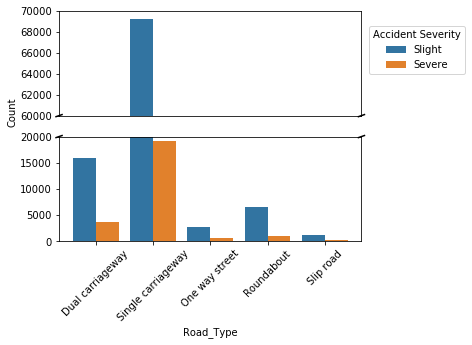

In [203]:
mapping = {
1:'Roundabout',
2:'One way street',
3:'Dual carriageway',
6:'Single carriageway',
7:'Slip road',
12:'Other'}

df_figure=df1.Road_Type.map(mapping)


brokenaxis(df_figure,20000,60000,70000,df1)

The above figure shows that single carriageway roads have the most accidents observed. However, road type is not necessarily a good predictor per se, but it might be kept for later analysis to measure its impact on the target variable with other predictors.

#### Accident Severity by Road User Type

In [204]:
df3["Casualty_Type"].replace(np.nan, df3.Casualty_Type.mode(), inplace=True)

In [205]:
Casualty_Type=[]
df_casualty=df3.loc[df3['Casualty_Severity'] < 3,['Casualty_Type']]
for casualty in df_casualty['Casualty_Type']:
        if casualty==0: Casualty_Type.append('Pedestrian')
        elif casualty==1: Casualty_Type.append('Cyclist')
        elif casualty==2 or casualty==3 or casualty==4 or casualty==5 or casualty==23 or casualty==97: Casualty_Type.append('Motorbike')
        elif casualty==8 or casualty==9: Casualty_Type.append('Car')
        elif casualty==10 or casualty==11 or casualty==19 or casualty==20 or casualty==21 or casualty==98: Casualty_Type.append('Truck')
        else: Casualty_Type.append('Other')

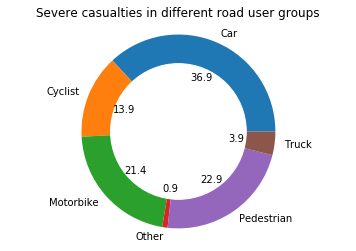

In [206]:
my_circle=plt.Circle((0,0),7, color='white')

df_figure = pd.DataFrame({'freq': Casualty_Type})
df_figure.groupby('freq', as_index=False).size().plot(kind='pie',radius=10,autopct='%.1f',title='Severe casualties in different road user groups')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.ylabel('')
plt.show()

The donut chart shows that overall there are more fatal/severe accidents occur among vulnerable road user groups than among their counterparts in cars or heavy vehicles (e.g. buses, truck and so on). This confirms the findings from the literature review and the ariable might be used for further analysis. 